In [1]:
import sqlite3
import pandas as pd

## Establishing connection

In [3]:
conn = sqlite3.connect("factbook.db")

In [4]:
# to return information on the tables in the database.
query = "select * from sqlite_master where type='table';"
pd.read_sql_query(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [6]:
# returns the first 5 rows of the facts table in the database.
query = "select * from facts limit 5;"
pd.read_sql_query(query, conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Summay Statistics

In [8]:
query = "select min(population), max(population), min(population_growth), max(population_growth) from facts;"
pd.read_sql_query(query, conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


## Outliers

In [11]:
# query that returns the countrie(s) with a population of 0.
query = "select * from facts where population = 0 ;"
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


obviously it could only be antartica - a continent where no one lives

In [12]:
# query that returns the countrie(s) with a population of 7256490011
query = "select * from facts where population = 7256490011  ;"
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


Its the data ab0ut the whole world 

## Histograms

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f814c14e908>,
      dtype=object)

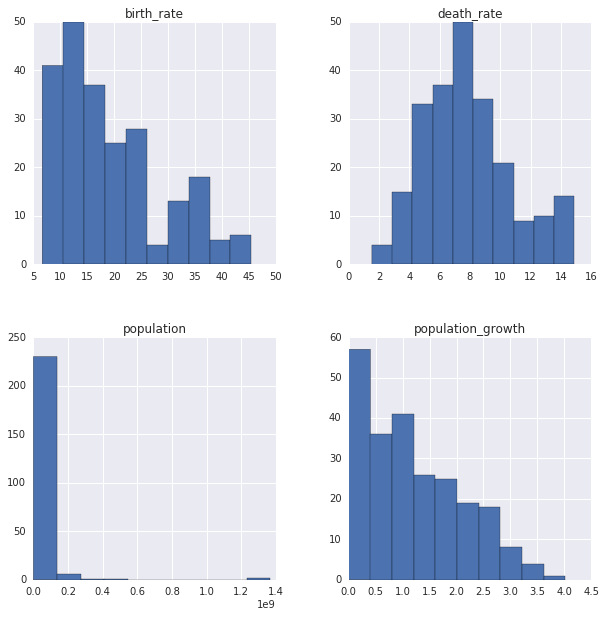

In [24]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
q = "select population, population_growth, birth_rate, death_rate from facts where population != (select min(population) from facts) and population != (select max(population) from facts);"
pd.read_sql_query(q, conn).hist(ax=ax)

## Which countries have the highest population density?

In [20]:
query = "select name, cast(population as float) / area as density from facts order by density desc;"
pd.read_sql_query(query, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


### histogram of population densities

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f814c1bda58>]],
      dtype=object)

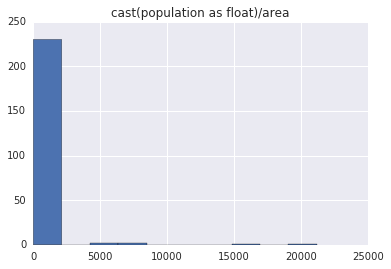

In [21]:
pd.read_sql_query("select cast(population as float)/area from facts;", conn).hist()    

## Which countries have the highest ratios of water to land? 

In [23]:
query = "select cast(area_water as float)/area_land ratio from facts order by ratio desc;"
pd.read_sql_query(query, conn)

,ratio
0,905.666667
1,4.520231
2,0.554791
3,0.386613
4,0.284673
5,0.259396
6,0.225710
7,0.222922
8,0.164356
9,0.156240


## Which countries have more water than land?

In [25]:
query = "select name, area_water, area_land from facts where area_water > area_land ;"
pd.read_sql_query(query, conn)

,name,area_water,area_land
0,British Indian Ocean Territory,54340,60
1,Virgin Islands,1564,346
